In [2]:
import pandas as pd
df=pd.read_csv("House.csv");
df.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [3]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
5,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
6,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
7,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
8,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
9,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0


In [3]:
x=df[['RM','PTRATIO']].values

In [4]:
y=df[['MEDV']].values

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)


In [6]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
y1=lr.predict(x_train)
y2=lr.predict(x_test)


In [9]:
from sklearn.metrics import mean_squared_error,r2_score
print("Training Error",mean_squared_error(y_train,y1))
print("Testing Error",mean_squared_error(y_test,y2))

Training Error 33.13779923243542
Testing Error 46.912236865940535


In [10]:
print("Training Accuracy: ",r2_score(y_train,y1))
print("Testing Accuracy: ",r2_score(y_test,y2))

Training Accuracy:  0.5747515672214984
Testing Accuracy:  0.5270281493963576


In [15]:
a=df[['RM']].values
b=df[['MEDV']].values

In [16]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(a,b)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [17]:
r1=dt.predict(a)

In [18]:
print(mean_squared_error(r1,b))
print(r2_score(r1,b))

4.451719471947195
0.9444442936481255


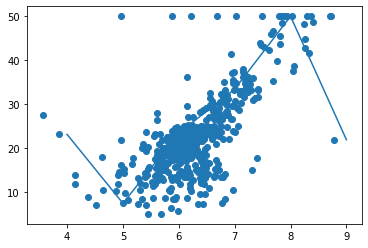

In [20]:
import matplotlib.pyplot as plt
import numpy as np
test=np.arange(4,10,1)[:,np.newaxis]
plt.scatter(a,b)
plt.plot(test,dt.predict(test))
plt.show()

In [22]:
#RANDOMFORESTREGRESSOR
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(a,b)
r2=rf.predict(a)


C:\Users\prate\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\prate\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
print(mean_squared_error(r2,b))
print(r2_score(r2,b))

12.002413577178332
0.8243667860448457
